In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv("medical-charges.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


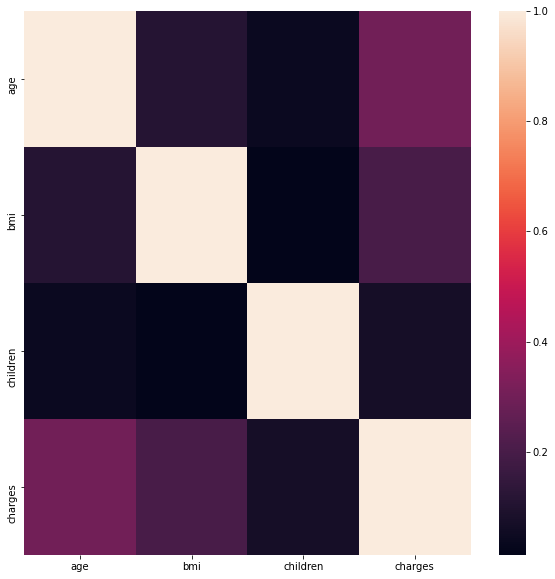

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())
plt.show()

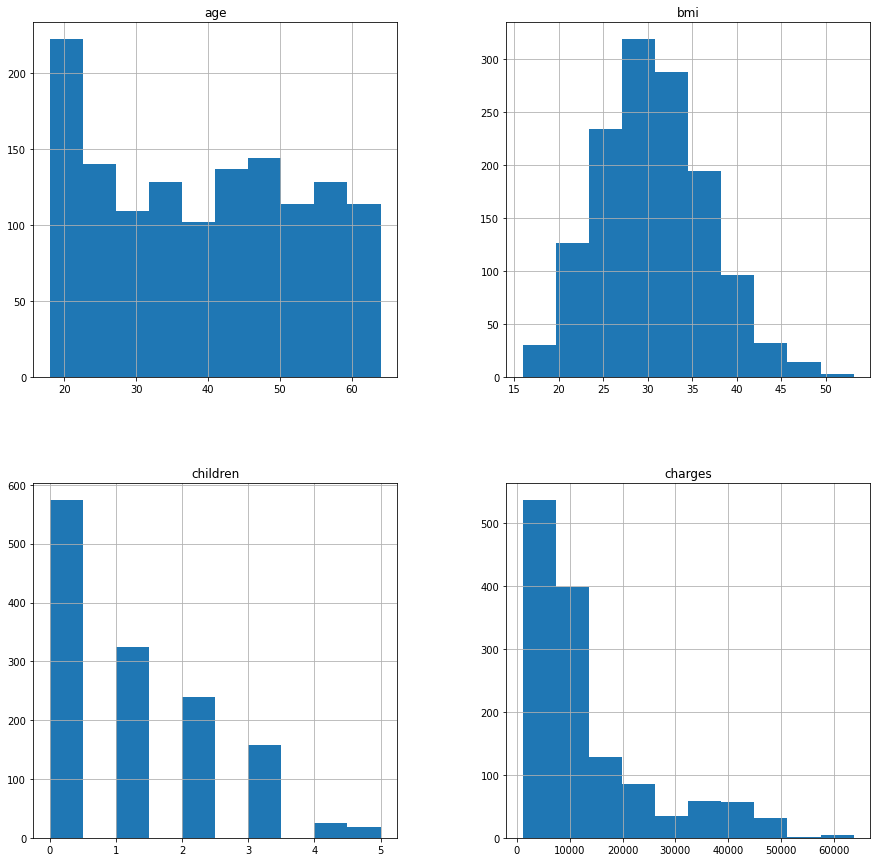

In [10]:
df.hist(figsize=(15,15))
plt.show()

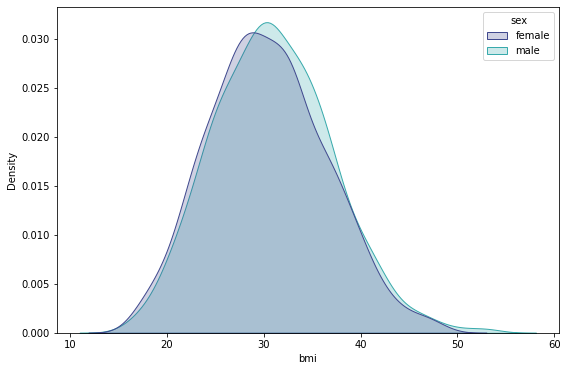

In [11]:
plt.figure(figsize=(9,6))
sns.kdeplot(data=df,x='bmi',hue='sex',shade=True,palette='mako')
plt.show()

c:\users\jillani softtech\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\jillani softtech\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


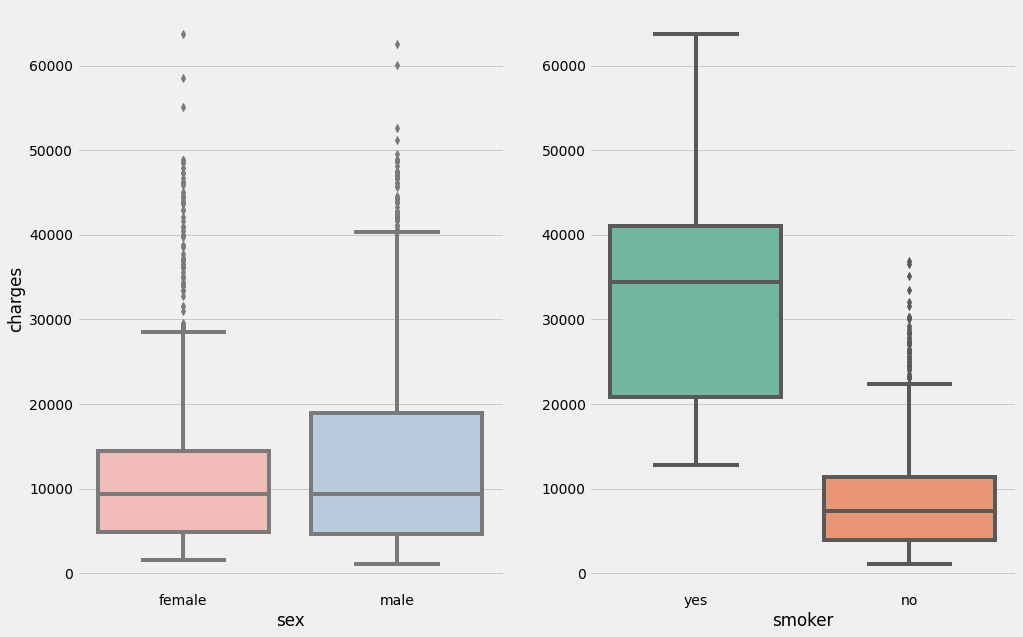

In [12]:
plt.style.use("fivethirtyeight")
fig=plt.figure(figsize=(15,10))
ax=fig.add_subplot(121)
ax=sns.boxplot(df.sex,df.charges,palette="Pastel1")

ax=fig.add_subplot(122)
ax=sns.boxplot(df.smoker,df.charges, palette="Set2")
ax.set_ylabel("")
plt.show()


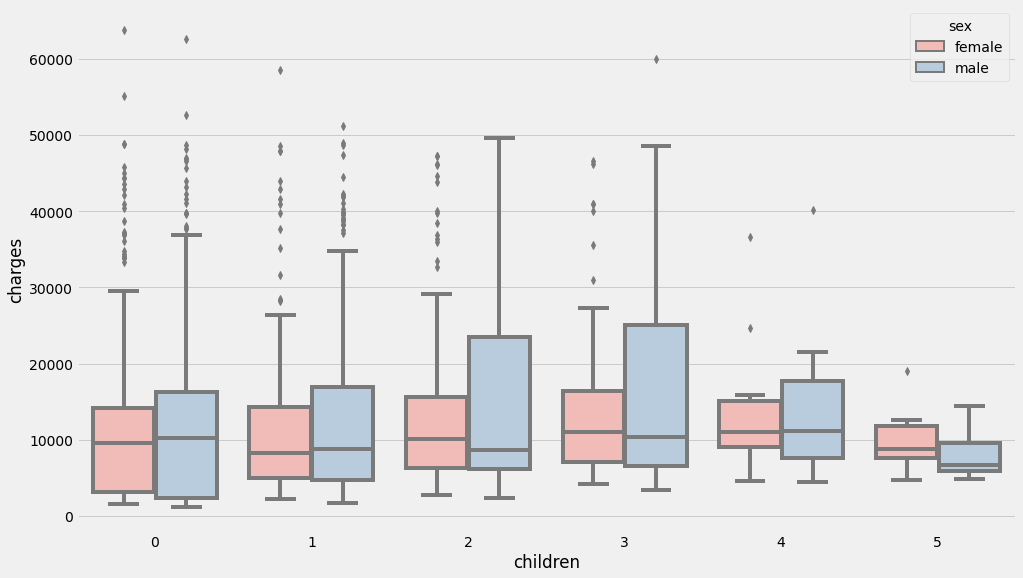

In [13]:
plt.figure(figsize=(15,9))
sns.boxplot(data=df, x="children",y="charges", hue="sex", palette="Pastel1")
plt.show()

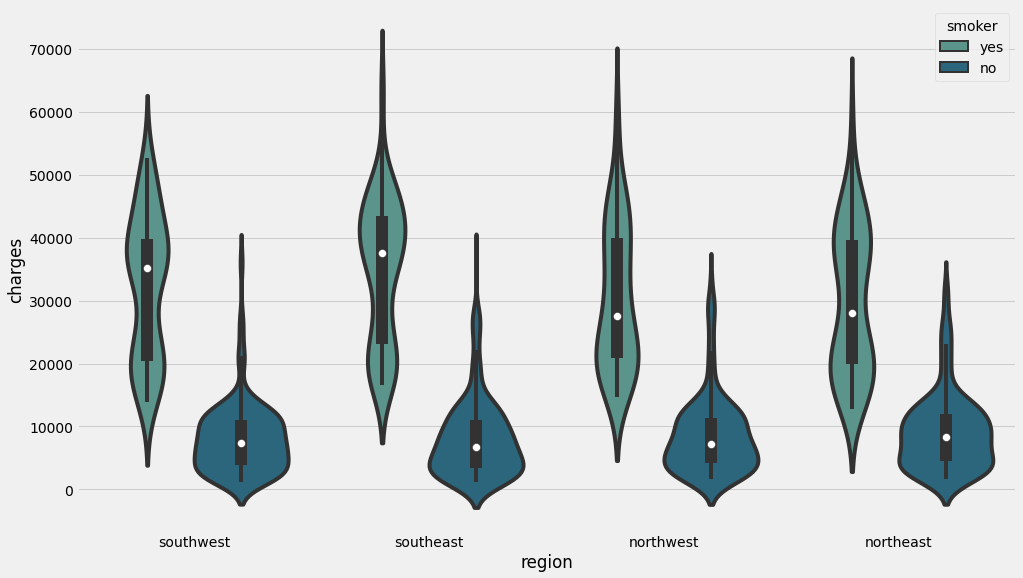

In [14]:
plt.figure(figsize=(15,9))
sns.violinplot(data=df, x="region", y="charges", hue="smoker", palette="crest")
plt.show()

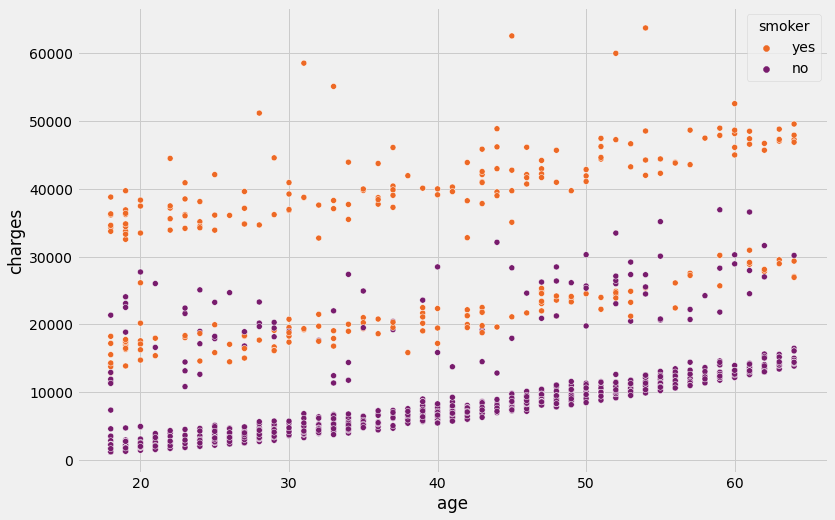

In [15]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x="age", y="charges", hue="smoker", palette="inferno_r")
plt.show()

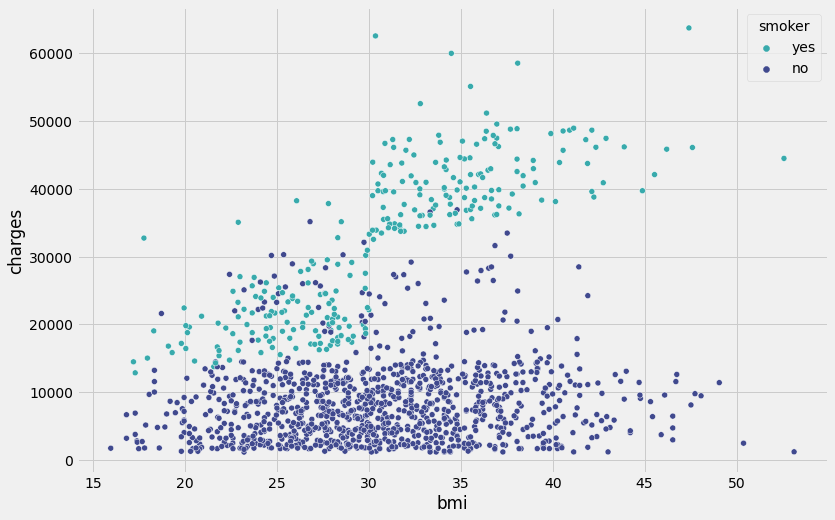

In [16]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x="bmi", y="charges", hue="smoker", palette="mako_r")
plt.show()

# Now Movie Data Preprocessing 
# Check Null and Dupliacated Values

In [17]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [18]:
df.duplicated().sum()

1

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [20]:
df.children.unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [21]:
df.children = df.children.astype("object")

In [22]:
df.children.dtype

dtype('O')

# Now Encoding

In [23]:
cat_cols=df.select_dtypes(include="object").columns
num_cols=df.select_dtypes(exclude='object').columns

In [24]:
cat_cols

Index(['sex', 'children', 'smoker', 'region'], dtype='object')

In [25]:
num_cols

Index(['age', 'bmi', 'charges'], dtype='object')

# Categorical Columns Encoding

In [26]:
from sklearn.preprocessing import OneHotEncoder

In [27]:
ohe=OneHotEncoder()

In [28]:
ohe_data=ohe.fit_transform(df[cat_cols]).toarray()
ohe_cols=ohe.get_feature_names(cat_cols)

In [29]:
ohe_df=pd.DataFrame(data=ohe_data,columns=ohe_cols)

In [30]:
df=df.join(ohe_df)

In [31]:
df.drop(cat_cols,axis=1,inplace=True)

In [32]:
df.head()

,age,bmi,charges,sex_female,sex_male,children_0,children_1,children_2,children_3,children_4,children_5,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,16884.92400,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1725.55230,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,4449.46200,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,21984.47061,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,3866.85520,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


# Now Numerical Columns

In [33]:
num_cols

Index(['age', 'bmi', 'charges'], dtype='object')

In [34]:
num_cols=num_cols[1:]

In [35]:
before=df.shape[0]

In [36]:
for col in num_cols:
    mean=df[col].mean()
    std=df[col].std()
    
    
    max_val=mean + 3*std
    min_val = mean - 3*std
    
    outliers = df[ (df[col]>max_val) | (df[col]<min_val)].index
    
    df.drop(outliers, axis=0, inplace=True)
    

after = df.shape[0]

print("Total Number of Outleirs :",(before-after))

Total Number of Outleirs : 12


In [37]:
from scipy.stats import skew

In [38]:
skew_cols = df[num_cols].apply(lambda x : skew(x)).sort_values(ascending=False)

skew_cols = skew_cols[skew_cols>0.5].index

df[skew_cols] = np.log1p(df[skew_cols])

In [39]:
df[num_cols].skew()

bmi        0.205412
charges   -0.104983
dtype: float64

# Normalization

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
scaler=MinMaxScaler()

In [42]:
cols=df.columns

In [43]:
data=scaler.fit_transform(df)
df=pd.DataFrame(data=df,columns=cols)

In [44]:
df.head()

,age,bmi,charges,sex_female,sex_male,children_0,children_1,children_2,children_3,children_4,children_5,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,9.734236,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,7.453882,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,8.400763,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,9.998137,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,8.260455,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


# Now Move on Models

In [45]:
X=df.drop('charges',axis=1)
y=df['charges']

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=75)

In [48]:
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
l_reg=LinearRegression()

In [51]:
l_reg.fit(X_train,y_train)

LinearRegression()

In [52]:
y_pred=l_reg.predict(X_test)

In [53]:
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
lr_acc = round(r2_score(y_test,y_pred),2)*100
print("RMSE of Linear Regression:",lr_rmse)
print(f"Accuracy of Linear Regression {lr_acc} %")

RMSE of Linear Regression: 0.39076192739601384
Accuracy of Linear Regression 82.0 %


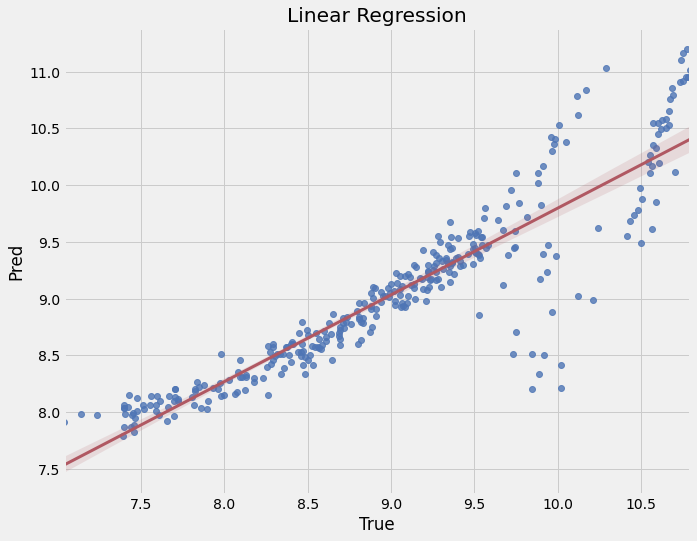

In [54]:
plt.figure(figsize=(10,8))
sns.regplot(x=y_test, y=y_pred, scatter_kws=dict(color="#4e75b5"),line_kws=dict(color="#b05862", linewidth=3))

plt.xlabel("True")
plt.ylabel("Pred")
plt.title("Linear Regression")
plt.show()

# Decision Tree Regressor

In [55]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(max_depth=5, random_state=5)
dt_reg.fit(X_train, y_train)

y_pred = dt_reg.predict(X_test)


dt_reg_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
dt_reg_acc = round(r2_score(y_test, y_pred),2)*100
print("RMSE of DT Regressor:",dt_reg_rmse)
print(f"Accuracy of DT Regressor {dt_reg_acc} %")

RMSE of DT Regressor: 0.31537050498467917
Accuracy of DT Regressor 88.0 %


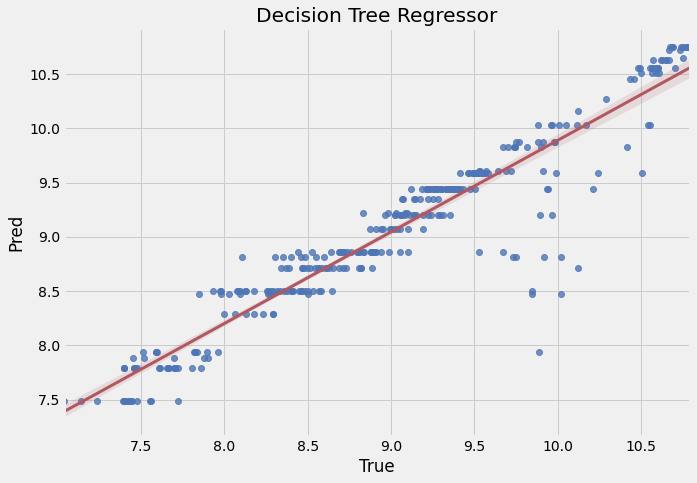

In [56]:
plt.figure(figsize=(10,7))

sns.regplot(x=y_test, y=y_pred,scatter_kws=dict(color="#4e75b5"),line_kws=dict(color="#b05862", linewidth=3))

plt.xlabel("True")
plt.ylabel("Pred")
plt.title("Decision Tree Regressor")
plt.show()

# Now Random Forest Reg

In [57]:
from sklearn.ensemble import RandomForestRegressor

In [58]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(max_depth=5 , random_state=6)

rf_reg.fit(X_train, y_train)

y_pred = rf_reg.predict(X_test)

rf_reg_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rf_reg_acc = round(r2_score(y_test, y_pred),2)*100

print("RMSE of RF Regressor:",rf_reg_rmse)
print(f"Accuracy of RF Regressor {rf_reg_acc} %")

RMSE of RF Regressor: 0.32237296581029845
Accuracy of RF Regressor 88.0 %


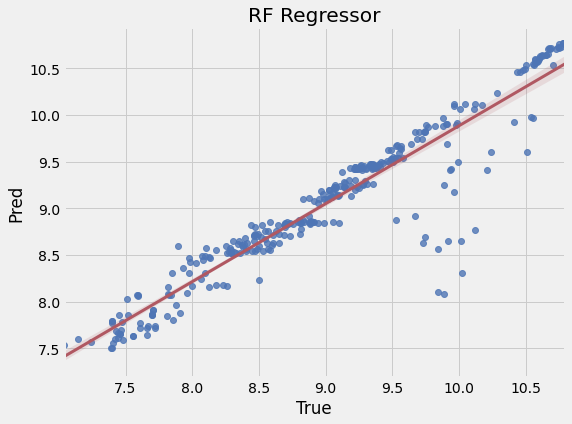

In [59]:
plt.figure(figsize=(8,6))
sns.regplot(x=y_test, y=y_pred, 
            scatter_kws=dict(color="#4e75b5"),
            line_kws=dict(color="#b05862", linewidth=3))
plt.xlabel("True")
plt.ylabel("Pred")
plt.title("RF Regressor")
plt.show()

# Gradient Booster Regression

In [60]:
from sklearn.ensemble import GradientBoostingRegressor

gb_reg = GradientBoostingRegressor(random_state=0)

gb_reg.fit(X_train, y_train)

y_pred = gb_reg.predict(X_test)

gb_reg_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
gb_reg_acc = round(r2_score(y_test, y_pred),1)*100

print("RMSE of GB Regressor:",gb_reg_rmse)
print(f"Accuracy of GB Regressor {gb_reg_acc} %")

RMSE of GB Regressor: 0.3125328958550867
Accuracy of GB Regressor 90.0 %


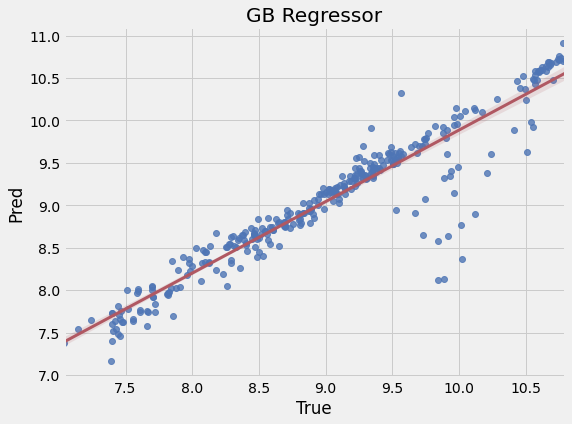

In [61]:
plt.figure(figsize=(8,6))
sns.regplot(x=y_test, y=y_pred, 
            scatter_kws=dict(color="#4e75b5"),
            line_kws=dict(color="#b05862", linewidth=3))
plt.xlabel("True")
plt.ylabel("Pred")
plt.title("GB Regressor")
plt.show()

# Adaboost Regressor

In [62]:
from sklearn.ensemble import AdaBoostRegressor

ada_reg = AdaBoostRegressor(random_state=6)
ada_reg.fit(X_train, y_train)
y_pred = ada_reg.predict(X_test)

ada_reg_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
ada_reg_acc = round(r2_score(y_test, y_pred),2)*100

print("RMSE of GB Regressor:",ada_reg_rmse)
print(f"Accuracy of GB Regressor {ada_reg_acc} %")

RMSE of GB Regressor: 0.42169052583344646
Accuracy of GB Regressor 79.0 %


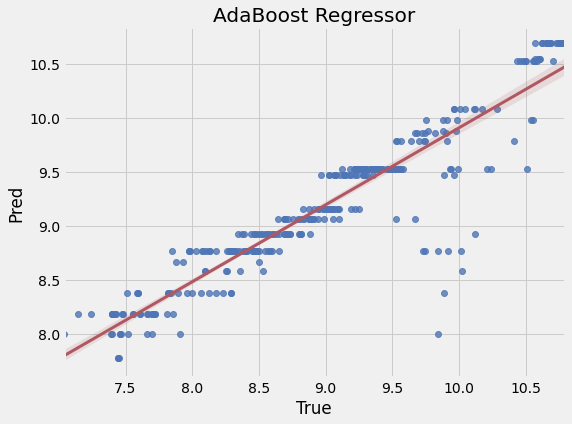

In [63]:
plt.figure(figsize=(8,6))
sns.regplot(x=y_test, y=y_pred, 
            scatter_kws=dict(color="#4e75b5"),
            line_kws=dict(color="#b05862", linewidth=3))
plt.xlabel("True")
plt.ylabel("Pred")
plt.title("AdaBoost Regressor")
plt.show()

# XGBoost Regressor

In [64]:
from xgboost import XGBRegressor

xgb_reg = XGBRegressor(random_state=19)
xgb_reg.fit(X_train, y_train)

y_pred = xgb_reg.predict(X_test)

xgb_reg_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
xgb_reg_acc = round(r2_score(y_test, y_pred),2)*100

print("RMSE of GB Regressor:",xgb_reg_rmse)
print(f"Accuracy of GB Regressor {xgb_reg_acc} %")

RMSE of GB Regressor: 0.39905454803997825
Accuracy of GB Regressor 81.0 %


c:\users\jillani softtech\appdata\local\programs\python\python39\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


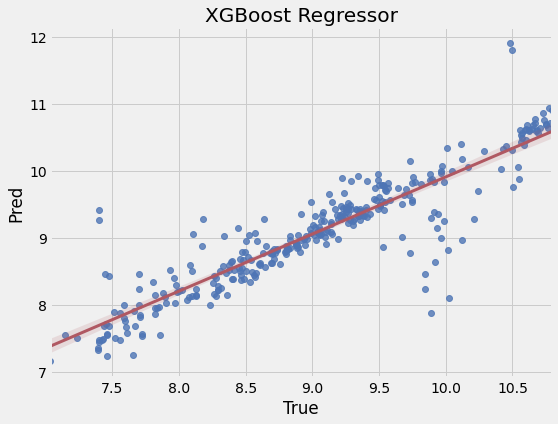

In [65]:
plt.figure(figsize=(8,6))
sns.regplot(x=y_test, y=y_pred, 
            scatter_kws=dict(color="#4e75b5"),
            line_kws=dict(color="#b05862", linewidth=3))
plt.xlabel("True")
plt.ylabel("Pred")
plt.title("XGBoost Regressor")
plt.show()

# Evaluating All Models

In [66]:
rmse_scores = {"Linear Regression": [lr_rmse],
                  "Decision Tree Regressor": [dt_reg_rmse],
                  "Random Forest": [rf_reg_rmse],
                  "Gradient Boosting Regressor":[gb_reg_rmse],
                  "Ada Boost Regressor" : [ada_reg_rmse],
                  "XGBRegressor":[xgb_reg_rmse]
              }
rmse_scores = pd.DataFrame(rmse_scores)

c:\users\jillani softtech\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


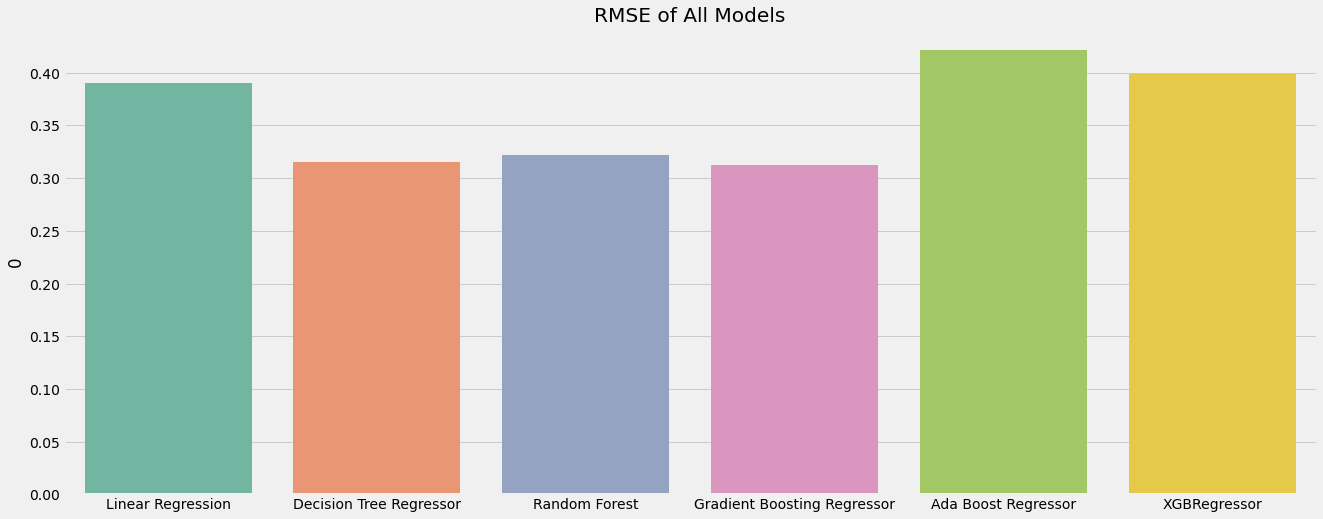

In [67]:
plt.figure(figsize=(20,8))
sns.barplot(rmse_scores.columns, rmse_scores.iloc[0], palette="Set2")
plt.title("RMSE of All Models")
plt.show()

In [68]:
r2_acc = {"Linear Regression": [lr_acc],
                  "Decision Tree Regressor": [dt_reg_acc],
                  "Random Forest": [rf_reg_acc],
                  "Gradient Boosting Regressor":[gb_reg_acc],
                  "Ada Boost Regressor" : [ada_reg_acc],
                  "XGBRegressor":[xgb_reg_acc]
              }
r2_acc= pd.DataFrame(r2_acc)

c:\users\jillani softtech\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


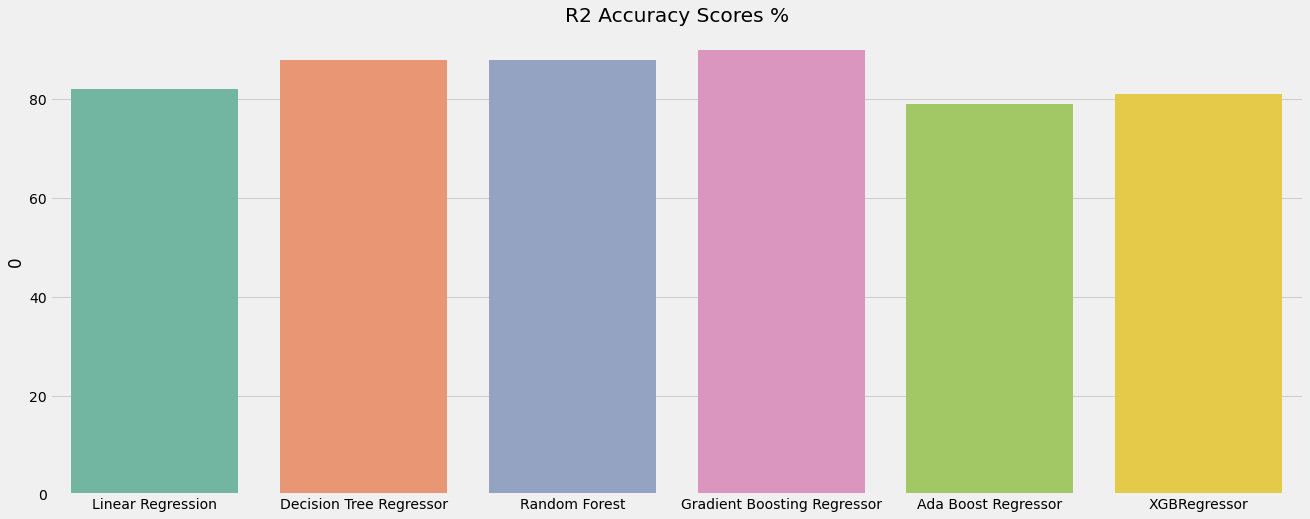

In [69]:
plt.figure(figsize=(20,8))
sns.barplot(r2_acc.columns, r2_acc.iloc[0], palette="Set2")
plt.title("R2 Accuracy Scores %")
plt.show()